In this Notebook you guys will implement linear regression using NumPy

We have provided hints along the way in the comments

Some cells we have commented "#DO NOT EDIT" please do not edit these cells as they will be used for evaluating your assignment


Any extra cells used must be commented to explain what is being done

BEST OF LUCK !!





In [153]:
#Importing neccessary libraries
#do not import anything else

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [2]:
#import the dataset
training_data_path = ".\lin_reg_dataset\dataset.csv";
data = pd.read_csv(training_data_path, index_col = 'Serial No.');

In [3]:
data.head()

varA  varB  varC  varD  varE  varF  Target
Serial No.                                            
1            337   118     4   4.5   4.5  9.65    0.92
2            324   107     4   4.0   4.5  8.87    0.76
3            316   104     3   3.0   3.5  8.00    0.72
4            322   110     3   3.5   2.5  8.67    0.80
5            314   103     2   2.0   3.0  8.21    0.65

In [186]:
#Separate features and target variables
y = data.loc[:, 'Target']
X = data.loc[:, [column for column in data.columns if column != 'Target']]

In [187]:
#Extra preproccesing if required
#hint: you may need to use .to_numpy and reshape functions

y = y.to_numpy().reshape(-1, 1);
X = X.to_numpy()

print(f"Shape of X : {X.shape} \nShape of y : {y.shape}")

Shape of X : (500, 6) 
Shape of y : (500, 1)


In [188]:
#Split train and test dataset use test size=0.2 and random_state=1
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [161]:
# Debug arrays
debug_X = np.array([[1, 2, 3],
                    [2, 3, 4]])
debug_y = np.array([[10], [4], [10]])
debug_w = np.array([[2], [3], [1]])

In [120]:
#Other preprocessing if required(transpose a matrix maybe?)


In [121]:
#initialize weights
#should return numpy array of weights and constant c
def weights_init(X_temp):
    #your code here
    weights = np.zeros(X_temp.shape[1]).reshape(-1, 1)
    return weights

print(weights_init(debug_X))

[[0.]
 [0.]
 [0.]]


In [122]:
#Calculate Hypothesis
def hypo(theta, X_temp):
    #your code here
    y_hat = X_temp @ theta
    return y_hat

print(hypo(debug_w, debug_X))

[[11]
 [17]]


In [165]:
#Calculate Cost
#hint: use np.square
def cost(y_hat,y_temp):
    #your code here
    m = y_temp.shape[0]
    J = np.square(y_hat - y_temp);
    J = 1 / (2 * m) * float(sum(J))
    return J

print(cost(np.ones(3).reshape(-1, 1), debug_y))

28.5


In [166]:
#Perform gradient descent
def gradient_descent(w, X_temp, y_temp, y_hat, alpha):
    #your code here 
    m = y_temp.shape[0]
    w -= alpha / m * np.transpose(X_temp) @ (y_hat - y_temp)
    #print(np.transpose(X_temp) @ (y_hat - y_temp))
    return w


In [167]:
#Assemble Your linear regression model 
#make it print cost after 25%,50%,75%,100% of the iterations are complete 
#also add an option to disable cost output and directly print cost after last iteration 
#hint use verbose as extra arguement of function
#costs is array of all costs
def lin_model_fit(X_temp, y_temp, alpha, iterations, verbose):
    #your code here
    theta = weights_init(X_temp)
    for iteration in range(iterations):
        theta = gradient_descent(theta, X_temp, y_temp, hypo(theta, X_temp), alpha)
        # print(theta)
        J = cost(hypo(theta, X_temp), y_temp)
    
        if iteration == int(iterations / 4) and verbose :
            print(f"Cost after {iteration} / {iterations} iteration : {J}")
        if iteration == int(iterations / 2) and verbose :
            print(f"Cost after {iteration} / {iterations} iteration : {J}")
        if iteration == int(3 * iterations / 4) and verbose :
            print(f"Cost after {iteration} / {iterations} iteration : {J}")
    
    print(f"Cost after {iterations} / {iterations} iteration : {J}")
    
    costs = []
    
    for data, prediction in zip(X_temp, y_temp):
        costs.append(cost(hypo(theta, data), prediction))

    return theta, J, costs
    

In [192]:
#Fit model to data
# use alpha=0.01,iter=100
lin_model_fit(X_train, y_train, 0.01, 100, True);

Cost after 25 / 100 intertation : 7.904302233482385e+157
Cost after 50 / 100 intertation : inf
Cost after 75 / 100 intertation : inf
Cost after 100 / 100 intertation : inf


C:\Users\Anirudh Achal\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  


In [193]:
# Normalize Data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [201]:
#Fit model to normalised data using minmaxscaler
#use alpha=0.01,iter=100

final_theta, J, costs = lin_model_fit(X_train, y_train, 0.01, 100, True);

Cost after 25 / 100 intertation : 0.09824463607519518
Cost after 50 / 100 intertation : 0.04200135087038907
Cost after 75 / 100 intertation : 0.022336160710261416
Cost after 100 / 100 intertation : 0.01560300800898864


In [ ]:
#draw combined graph of above models of cost V/s iterations


In [206]:
#store best value of weights in weights_final
weights_final = final_theta
print(weights_final)

[[0.17155068]
 [0.17771103]
 [0.16350956]
 [0.18829076]
 [0.18189938]
 [0.18678509]]


In [207]:
#write function to use model on data for prediction
def predict(X_temp, theta):
    #your code here
    prediction = hypo(theta, X_temp)
    return prediction

In [208]:
#Calculate accuracy 

def accuracy(y_temp,y_hat):
    acc = cost(y_temp, y_hat)
    return acc

In [209]:
#call predict function to make predictions on test and train data
#DO NOT EDIT
pred_train=predict(X_train,weights_final)
pred_test=predict(X_test,weights_final)


In [211]:
#DO NOT EDIT
print("=============For train data:=============")
acc1=accuracy(y_train,pred_train)
print("accuracy:",acc1)
print("\n\n=============For test data================")
acc2=accuracy(y_test,pred_test)
print("accuracy:",acc2)

=============For train data:=============
accuracy: 0.01560300800898864


=============For test data================
accuracy: 2911.9768150958234


The below cells plot y_hat vs y
The closer the plot is to a straight line;The better your model

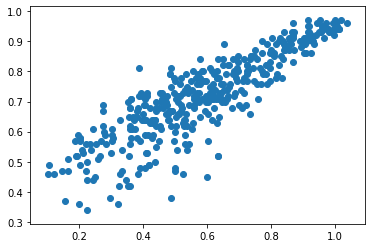

In [214]:
plt.scatter(pred_train, y_train)
plt.show()

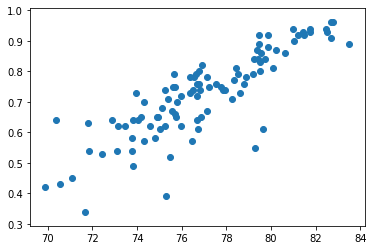

In [215]:
plt.scatter(pred_test, y_test)
plt.show()

The Below questions are optional and can be done for brownie points

In [ ]:
#Try out hyperparameter tuning for alpha

In [ ]:
#Print your best accuracy acheived and hyperparameter value